In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
data = pd.read_csv("../Warehouse/Warehouse_and_Retail_Sales.csv")
data

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.00,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.00,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.00,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.00,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.00,4.0,0.0
...,...,...,...,...,...,...,...,...,...
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46,59.0,212.0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9.08,7.0,35.0
128352,2018,2,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.00,0.0,32.0
128353,2018,2,NaN,BC,BEER CREDIT,REF,0.00,0.0,-35.0


# Limpiar

In [9]:
#Filtrar y quedarnos con algunas de las columnas
dataframe = pd.DataFrame(data)
dataframe= dataframe[['YEAR','MONTH','SUPPLIER','ITEM DESCRIPTION','ITEM TYPE','RETAIL SALES']]
dataframe

,YEAR,MONTH,SUPPLIER,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES
0,2017,4,ROYAL WINE CORP,GAMLA CAB - 750ML,WINE,0.00
1,2017,4,SANTA MARGHERITA USA INC,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.00
2,2017,4,JIM BEAM BRANDS CO,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.00
3,2017,4,HEAVEN HILL DISTILLERIES INC,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.00
4,2017,4,ROYAL WINE CORP,RAMON CORDOVA RIOJA - 750ML,WINE,0.00
...,...,...,...,...,...,...
128350,2018,2,ANHEUSER BUSCH INC,HOEGAARDEN 4/6NR - 12OZ,BEER,66.46
128351,2018,2,COASTAL BREWING COMPANY LLC,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9.08
128352,2018,2,BOSTON BEER CORPORATION,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.00
128353,2018,2,NaN,BEER CREDIT,REF,0.00


In [10]:
#Verificar si hay duplicados (y eliminarlos si hubiera)
bool_series = dataframe.duplicated()
bool_series
count = 0
for i in bool_series:
    if i==True:
        count=+1
print(count) #0

1


# Estadísticas


In [11]:
# Preguntas:
# - Cuales son las ventas por mes? En qué mes hubieron más ventas?
# - Qué meses son los de temporada alta y cuales los de temporada baja?
# - Qué tipos de productos no se vendieron
# - Qué producto es el que tuvo mas ventas
# - Qué proveedor es del que se vendió mas y menos?
# - Qué productos tiene cada proveedor


In [23]:
#Total de ventas por mes
total_month_sales=dataframe.groupby('MONTH')['RETAIL SALES'].sum().sort_values(ascending=True)
#se vende más en diciembre y menos en abril
total_month_sales

MONTH
4          0.00
1      75791.77
2      77804.13
8      87111.78
10     89236.96
9      90452.60
5      94693.49
6      97357.26
11     98316.19
12    131634.49
Name: RETAIL SALES, dtype: float64

In [14]:
dataframe.groupby('ITEM TYPE')['RETAIL SALES'].sum().sort_values(ascending=True)
#Dunnage y Kegs

ITEM TYPE
DUNNAGE              0.00
KEGS                 0.00
REF                281.34
STR_SUPPLIES       995.98
NON-ALCOHOL       8109.97
BEER            209763.11
LIQUOR          309847.85
WINE            313400.42
Name: RETAIL SALES, dtype: float64

In [37]:
supplier_count=dataframe.groupby('SUPPLIER')['ITEM TYPE'].value_counts().sort_values(ascending=False)
supplier_count
#A VINTNERS SELECTIONS  


SUPPLIER                           ITEM TYPE
A VINTNERS SELECTIONS              WINE         7987
REPUBLIC NATIONAL DISTRIBUTING CO  WINE         7801
MONSIEUR TOUTON SELECTION          WINE         4239
LEGENDS LTD                        BEER         4177
E & J GALLO WINERY                 WINE         3990
                                                ... 
FIORE WINERY                       WINE            1
BLACK ANKLE VINEYARDS LLC          WINE            1
URUGUAY IMPORTS LTD                WINE            1
CALVERT BREWING COMPANY            BEER            1
LABATT USA OPERATING CO LLC        KEGS            1
Name: ITEM TYPE, Length: 504, dtype: int64

In [124]:
supplier_sales=dataframe.groupby('SUPPLIER')['RETAIL SALES'].sum().sort_values(ascending=True)
supplier_sales_filtered=supplier_sales[supplier_sales!=0]
supplier_sales_filtered

supplier_sales_7=supplier_sales[supplier_sales>=60000].count()
supplier_sales_6=supplier_sales[supplier_sales>=50000].count()-supplier_sales_7
supplier_sales_5=supplier_sales[supplier_sales>=40000].count()-(supplier_sales_7+supplier_sales_6)
supplier_sales_4=supplier_sales[supplier_sales>=30000].count()-(supplier_sales_7+supplier_sales_6+supplier_sales_5)

supplier_sales_0=supplier_sales[supplier_sales==0].count()
supplier_sales_1=supplier_sales[supplier_sales<10000].count()-supplier_sales_0
supplier_sales_2=supplier_sales[supplier_sales<20000].count()-(supplier_sales_0+supplier_sales_1)
supplier_sales_3=supplier_sales[supplier_sales<30000].count()-(supplier_sales_0+supplier_sales_1+supplier_sales_2)

#supplier_sales_0#17 proveedores tienen 0 en ventas
#supplier_sales_0+supplier_sales_1+supplier_sales_2+supplier_sales_3+supplier_sales_4+supplier_sales_5+supplier_sales_6+supplier_sales_7
#supplier_sales.count()
# for index, row in supplier_sales.iteritems(): 
#     supplier_sales.drop[index]

333

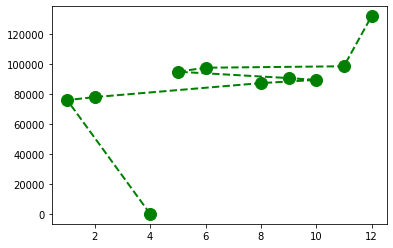

In [30]:
#plt.plot(total_month_sales,'go')
plt.plot(total_month_sales, color='green', marker='o', linestyle='dashed',     linewidth=2, markersize=12)


<AxesSubplot:>

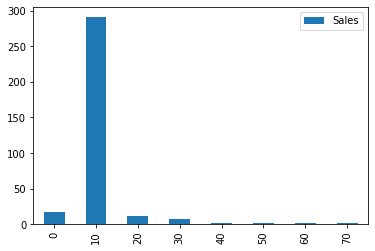

In [126]:
plotdata = pd.DataFrame(
    {"Sales": [supplier_sales_0,supplier_sales_1,supplier_sales_2,supplier_sales_3,
    supplier_sales_4,supplier_sales_5,supplier_sales_6,supplier_sales_7]}, 
    index=["0", "10", "20", "30", "40", "50", "60","70"])
# Plot a bar chart
plotdata.plot(kind="bar")